# 1. Loading the dataset:

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

WHO_WB_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [171]:
WHO_WB_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [172]:
for column_name in WHO_WB_df.columns:
    print("Unique values in column {} are: {}".format(column_name, WHO_WB_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [173]:
WHO_WB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

# 2. Detecting problems with the data:

In [174]:
for column_name in ["Life expectancy ","Adult Mortality","infant deaths","Alcohol","percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio","Total expenditure","Diphtheria "," HIV/AIDS","GDP","Population"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]:
    print('These are the problematic values in the variable {}'.format(column_name))
    for value in WHO_WB_df[column_name]:
        try:
            float(value)
        except:
            print(value)
        

These are the problematic values in the variable Life expectancy 
These are the problematic values in the variable Adult Mortality
These are the problematic values in the variable infant deaths
These are the problematic values in the variable Alcohol
These are the problematic values in the variable percentage expenditure
These are the problematic values in the variable Hepatitis B
These are the problematic values in the variable Measles 
These are the problematic values in the variable  BMI 
These are the problematic values in the variable under-five deaths 
These are the problematic values in the variable Polio
These are the problematic values in the variable Total expenditure
These are the problematic values in the variable Diphtheria 
These are the problematic values in the variable  HIV/AIDS
These are the problematic values in the variable GDP
These are the problematic values in the variable Population
These are the problematic values in the variable  thinness  1-19 years
These are

In [175]:
WHO_WB_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
WHO_WB_df.isnull().sum()*100/WHO_WB_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [177]:
#checking the frequencies for all the categorical values

WHO_WB_df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [178]:
#checking the frequencies for all the categorical values

WHO_WB_df.Country.value_counts()

Costa Rica                               16
Tunisia                                  16
Malawi                                   16
Democratic Republic of the Congo         16
South Africa                             16
Bahamas                                  16
Australia                                16
Panama                                   16
Lesotho                                  16
Iran (Islamic Republic of)               16
Burkina Faso                             16
Eritrea                                  16
United Republic of Tanzania              16
Togo                                     16
Israel                                   16
Georgia                                  16
Dominican Republic                       16
New Zealand                              16
Belarus                                  16
Montenegro                               16
Bulgaria                                 16
Congo                                    16
Cambodia                        

In [179]:
WHO_WB_df["Life expectancy "].fillna(WHO_WB_df["Life expectancy "].mean(), inplace=True)
WHO_WB_df["Adult Mortality"].fillna(WHO_WB_df["Adult Mortality"].mean(), inplace=True)
WHO_WB_df["Alcohol"].fillna(WHO_WB_df["Alcohol"].mean(), inplace=True)
WHO_WB_df["Hepatitis B"].fillna(WHO_WB_df["Hepatitis B"].mean(), inplace=True)
WHO_WB_df["Polio"].fillna(WHO_WB_df["Polio"].mean(), inplace=True)
WHO_WB_df["Total expenditure"].fillna(WHO_WB_df["Total expenditure"].mean(), inplace=True)
WHO_WB_df["Diphtheria "].fillna(WHO_WB_df["Diphtheria "].mean(), inplace=True)
WHO_WB_df["GDP"].fillna(WHO_WB_df["GDP"].mean(), inplace=True)
WHO_WB_df["Population"].fillna(WHO_WB_df["Population"].mean(), inplace=True)
WHO_WB_df[" thinness  1-19 years"].fillna(WHO_WB_df[" thinness  1-19 years"].mean(), inplace=True)
WHO_WB_df[" thinness 5-9 years"].fillna(WHO_WB_df[" thinness 5-9 years"].mean(), inplace=True)
WHO_WB_df["Income composition of resources"].fillna(WHO_WB_df["Income composition of resources"].mean(), inplace=True)
WHO_WB_df["Schooling"].fillna(WHO_WB_df["Schooling"].mean(), inplace=True)
WHO_WB_df[" BMI "].fillna(WHO_WB_df[" BMI "].mean(), inplace=True)

In [180]:
WHO_WB_df.isnull().sum()*100/WHO_WB_df.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [181]:
WHO_WB_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [182]:
WHO_WB_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


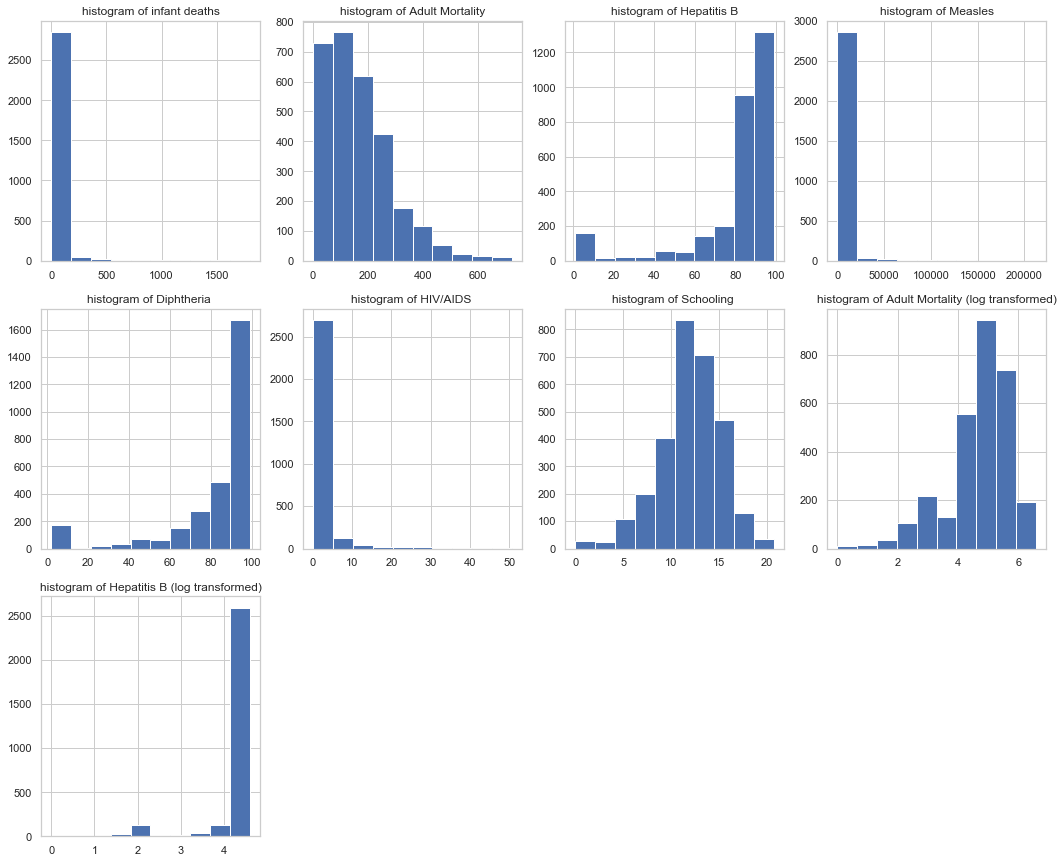

In [183]:
plt.figure(figsize=(18,15))

plt.subplot(3,4,1)
plt.hist(WHO_WB_df["infant deaths"])
plt.title('histogram of infant deaths')

plt.subplot(3,4,2)
plt.hist(WHO_WB_df["Adult Mortality"])
plt.title('histogram of Adult Mortality')

plt.subplot(3,4,3)
plt.hist(WHO_WB_df["Hepatitis B"])
plt.title('histogram of Hepatitis B')


plt.subplot(3,4,4)
plt.hist(WHO_WB_df["Measles "])
plt.title('histogram of Measles')


plt.subplot(3,4,5)
plt.hist(WHO_WB_df["Diphtheria "])
plt.title('histogram of Diphtheria ')

plt.subplot(3,4,6)
plt.hist(WHO_WB_df[" HIV/AIDS"])
plt.title('histogram of HIV/AIDS ')

plt.subplot(3,4,7)
plt.hist(WHO_WB_df["Schooling"])
plt.title('histogram of Schooling ')


plt.subplot(3,4,8)
plt.hist(np.log(WHO_WB_df["Adult Mortality"]))
plt.title("histogram of Adult Mortality (log transformed)")


plt.subplot(3,4,9)
plt.hist(np.log(WHO_WB_df["Hepatitis B"]))
plt.title("histogram of Hepatitis B (log transformed)")



   

plt.show()

ValueError: supplied range of [1.0, inf] is not finite

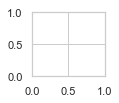

In [186]:
plt.subplot(3,4,10)
plt.hist(np.exp(WHO_WB_df["Measles "]))
